# Setup

In [39]:
from coba.experiments import Result
from matplotlib import pyplot as plt

c1 = "#E69F00"
c2 = "#0072B2"
c3 = "#009E73"
c4 = "#56B4E9"
c5 = "#D55E00"

plt.rc('font',weight='normal',size=14)

figsize = (6,2.5)
legend  = dict(columnspacing=1,handletextpad=.4,handlelength=1)

def plt_legend(order=[],**kwargs):
    handles, labels = plt.gca().get_legend_handles_labels()
    
    for l in labels:
        print(l)
    
    order = order or range(len(handles))
    plt.legend([handles[i] for i in order], [labels[i] for i in order],**legend,**kwargs)

# Bounded

In [13]:
#parametric, 1_000, 2_000, 16_000, 32_000
bounded = Result.from_file('../results/bounded.log.gz').filter_fin(l='learner_id',p='environment_id')


32,000
16,000
1,000
Parametric


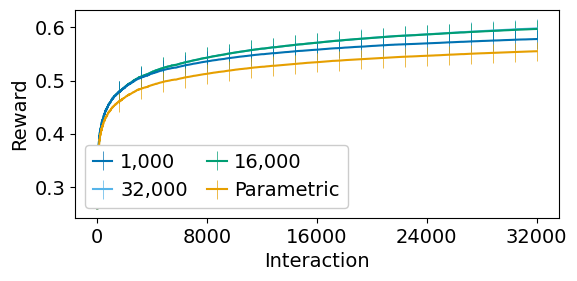

In [16]:
labels = ['Parametric', '1,000', '16,000', '32,000']
colors = [c1,c2,c3,c4,c5]
plt.figure(figsize=(6,2.5))
bounded.where(learner_id=[0,1,3,4]).plot_learners(err='bs',labels=labels,colors=colors,out=None)
plt.title('',loc='left')
plt_legend([2,0,1,3], loc='lower left', ncol=2, facecolor='white', framealpha=1)
plt.xticks([0,8000,16000,24000,32000],[0,8000,16000,24000,32000])
plt.tight_layout()
plt.savefig('bounded_full.pdf', format='pdf', bbox_inches="tight")

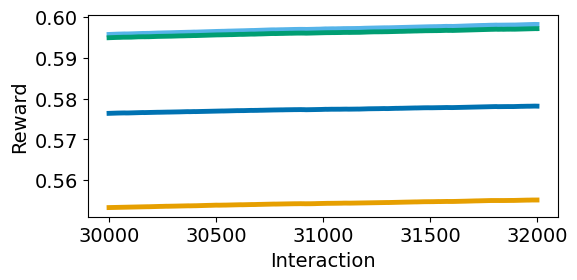

In [17]:
labels = ['Parametric', '1,000', '16,000', '32,000']
colors = [c1,c2,c3,c4,c5]

original = plt.rcParams['lines.linewidth']
plt.rcParams['lines.linewidth'] = 3.5

plt.figure(figsize=figsize)
bounded.where(learner_id=[0,1,3,4]).plot_learners(err=None,xlim=(30000,32000),labels=labels,colors=colors,out=None)

plt.title('',loc='left')
plt.legend('',frameon=False)

plt.rcParams['lines.linewidth'] = original

plt.tight_layout()
plt.savefig('bounded_zoom.pdf', format='pdf', bbox_inches="tight")

Parametric Is Best (3)
Tie (7)
PEMT-CB 1k Memories Is Best (32)


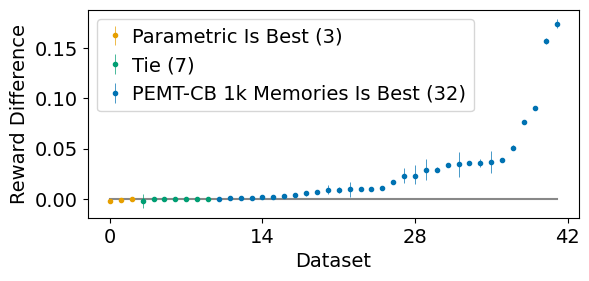

In [14]:
plt.figure(figsize=figsize)
bounded.plot_contrast(0,1,x='openml_task',err='bs',labels=['Parametric Is Best','PEMT-CB 1k Memories Is Best'] ,colors=[c1,c3,c2],xticks=False,out=None)
plt.title('',loc='left')
plt_legend(loc='upper left')
plt.xticks([0,14,28,42])
plt.xlabel("Dataset")
plt.ylabel("Reward Difference")
plt.tight_layout()
plt.savefig('pemt_1k_para_data.pdf', format='pdf', bbox_inches="tight")

Parametric Is Best (1)
Tie (5)
PEMT-CB 32k Memories Is Best (36)


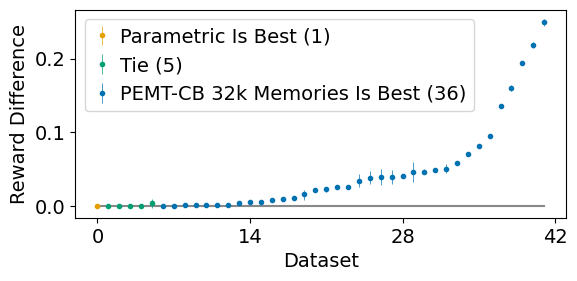

In [15]:
plt.figure(figsize=figsize)
bounded.plot_contrast(0,4,x='openml_task',err='bs',labels=['Parametric Is Best','PEMT-CB 32k Memories Is Best'] ,colors=[c1,c3,c2],xticks=False,out=None)
plt.title('',loc='left')
plt_legend(loc='upper left')
plt.xticks([0,14,28,42])
plt.xlabel("Dataset")
plt.ylabel("Reward Difference")
plt.tight_layout()
plt.savefig('pemt_32k_para_data.pdf', format='pdf', bbox_inches="tight")